Topics
- Pandas package
- Creating Series and DataFrame
- How to create and read csv or tsv files
- Reading Glaobal sales data
- Understainding the dataset
    - How many rows and columns are there
    - Column names
    - Column wise statistics
    - dtypes
    - categorical columns
    - Check for missing values
- Different operations on dataframe objects
- Slicing and Indexing
    - Location based Indexing
    - Position Based Indexing
- Merging Dataframes

In [1]:
import pandas as pd
pd.__version__

'0.23.4'

Series
 - From list
 - From tuple
 - From dict
 - From numpy array

In [2]:
pd.Series([23,45,7,14])

0    23
1    45
2     7
3    14
dtype: int64

In [4]:
import numpy as np
np.array([23,45,7,14])

array([23, 45,  7, 14])

In [6]:
s = pd.Series([1,2,3],['one','two','three'])
s

one      1
two      2
three    3
dtype: int64

In [8]:
print(s[0])
print(s['one'])

1
1


In [9]:
help(pd.date_range)

Help on function date_range in module pandas.core.indexes.datetimes:

date_range(start=None, end=None, periods=None, freq=None, tz=None, normalize=False, name=None, closed=None, **kwargs)
    Return a fixed frequency DatetimeIndex.
    
    Parameters
    ----------
    start : str or datetime-like, optional
        Left bound for generating dates.
    end : str or datetime-like, optional
        Right bound for generating dates.
    periods : integer, optional
        Number of periods to generate.
    freq : str or DateOffset, default 'D' (calendar daily)
        Frequency strings can have multiples, e.g. '5H'. See
        :ref:`here <timeseries.offset_aliases>` for a list of
        frequency aliases.
    tz : str or tzinfo, optional
        Time zone name for returning localized DatetimeIndex, for example
        'Asia/Hong_Kong'. By default, the resulting DatetimeIndex is
        timezone-naive.
    normalize : bool, default False
        Normalize start/end dates to midnight befo

In [11]:
pd.date_range('2019-10-11',periods=5)

DatetimeIndex(['2019-10-11', '2019-10-12', '2019-10-13', '2019-10-14',
               '2019-10-15'],
              dtype='datetime64[ns]', freq='D')

In [12]:
pd.date_range('2019-10-11','2019-10-15')

DatetimeIndex(['2019-10-11', '2019-10-12', '2019-10-13', '2019-10-14',
               '2019-10-15'],
              dtype='datetime64[ns]', freq='D')

In [13]:
temp = pd.Series([25,28,32,30,27],\
    pd.date_range('2019-10-11','2019-10-15'))
temp

2019-10-11    25
2019-10-12    28
2019-10-13    32
2019-10-14    30
2019-10-15    27
Freq: D, dtype: int64

In [14]:
d = {'hari':34,'giri':67,'raj':56}
sd = pd.Series(d)
sd

hari    34
giri    67
raj     56
dtype: int64

Pandas DataFrame
- From dict
- From numpy 2d array
- From csv or tsv or Excel file

In [15]:
d = {'name':['hari','giri','raj'],
    'marks':[67,89,94],
    'grade':['C','A','A+']}
pd.DataFrame(d)

,name,marks,grade
0,hari,67,C
1,giri,89,A
2,raj,94,A+


In [16]:
array_2d= np.array([['hari',67,'C'],
                    ['giri',89,'A'],
                    ['raj',94,'A+']])
pd.DataFrame(array_2d)

,0,1,2
0,hari,67,C
1,giri,89,A
2,raj,94,A+


In [17]:
pd.DataFrame(array_2d,
             columns=['name','marks','grade'])

,name,marks,grade
0,hari,67,C
1,giri,89,A
2,raj,94,A+


In [18]:
df = pd.read_csv('marks.csv')
df

,name,marks,grade
0,hari,67,C
1,giri,89,A
2,raj,94,A+


In [21]:
df1 = pd.read_csv('marks.tsv')
df1

,name marks grade
0,hari\t87\tC
1,giri\t89\tA
2,raj\t94\tA+


In [22]:
df1 = pd.read_csv('marks.tsv',sep='\t')
df1

,name,marks,grade
0,hari,87,C
1,giri,89,A
2,raj,94,A+


In [23]:
path ="https://raw.githubusercontent.com/sumathi16/ML_FDP_VVIT_2019/master/global_sales_data/market_fact.csv"
data = pd.read_csv(path)
data.head() # top five rows

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin
0,Ord_5446,Prod_16,SHP_7609,Cust_1818,136.81,0.01,23,-30.51,3.60,0.56
1,Ord_5406,Prod_13,SHP_7549,Cust_1818,42.27,0.01,13,4.56,0.93,0.54
2,Ord_5446,Prod_4,SHP_7610,Cust_1818,4701.69,0.00,26,1148.90,2.50,0.59
3,Ord_5456,Prod_6,SHP_7625,Cust_1818,2337.89,0.09,43,729.34,14.30,0.37
4,Ord_5485,Prod_17,SHP_7664,Cust_1818,4233.15,0.08,35,1219.87,26.30,0.38


In [24]:
data.tail() # last Five rows

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin
8394,Ord_5353,Prod_4,SHP_7479,Cust_1798,2841.4395,0.08,28,374.63,7.69,0.59
8395,Ord_5411,Prod_6,SHP_7555,Cust_1798,127.1600,0.10,20,-74.03,6.92,0.37
8396,Ord_5388,Prod_6,SHP_7524,Cust_1798,243.0500,0.02,39,-70.85,5.35,0.40
8397,Ord_5348,Prod_15,SHP_7469,Cust_1798,3872.8700,0.03,23,565.34,30.00,0.62
8398,Ord_5459,Prod_6,SHP_7628,Cust_1798,603.6900,0.00,47,131.39,4.86,0.38


In [25]:
data.head(10)

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin
0,Ord_5446,Prod_16,SHP_7609,Cust_1818,136.8100,0.01,23,-30.51,3.60,0.56
1,Ord_5406,Prod_13,SHP_7549,Cust_1818,42.2700,0.01,13,4.56,0.93,0.54
2,Ord_5446,Prod_4,SHP_7610,Cust_1818,4701.6900,0.00,26,1148.90,2.50,0.59
3,Ord_5456,Prod_6,SHP_7625,Cust_1818,2337.8900,0.09,43,729.34,14.30,0.37
4,Ord_5485,Prod_17,SHP_7664,Cust_1818,4233.1500,0.08,35,1219.87,26.30,0.38
5,Ord_5446,Prod_6,SHP_7608,Cust_1818,164.0200,0.03,23,-47.64,6.15,0.37
6,Ord_31,Prod_12,SHP_41,Cust_26,14.7600,0.01,5,1.32,0.50,0.36
7,Ord_4725,Prod_4,SHP_6593,Cust_1641,3410.1575,0.10,48,1137.91,0.99,0.55
8,Ord_4725,Prod_13,SHP_6593,Cust_1641,162.0000,0.01,33,45.84,0.71,0.52
9,Ord_4725,Prod_6,SHP_6593,Cust_1641,57.2200,0.07,8,-27.72,6.60,0.37


In [28]:
data.sample(6)

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin
3267,Ord_4716,Prod_8,SHP_6582,Cust_1601,269.20,0.02,15,69.61,1.99,0.42
1254,Ord_1527,Prod_6,SHP_2111,Cust_561,161.67,0.08,45,-7.71,2.20,0.39
2375,Ord_3890,Prod_6,SHP_5394,Cust_1341,3676.96,0.09,38,1233.45,19.99,0.37
5709,Ord_2078,Prod_6,SHP_2842,Cust_791,180.38,0.08,29,-119.32,7.49,0.37
1274,Ord_5279,Prod_6,SHP_7368,Cust_1785,267.53,0.00,36,85.17,2.00,0.39
5556,Ord_3997,Prod_6,SHP_5560,Cust_1365,617.51,0.01,30,98.10,9.03,0.37


In [29]:
data.shape

(8399, 10)

In [30]:
data.columns

Index(['Ord_id', 'Prod_id', 'Ship_id', 'Cust_id', 'Sales', 'Discount',
       'Order_Quantity', 'Profit', 'Shipping_Cost', 'Product_Base_Margin'],
      dtype='object')

In [31]:
data.index

RangeIndex(start=0, stop=8399, step=1)

to check for missing values

In [34]:
data.isnull().sum()

Ord_id                  0
Prod_id                 0
Ship_id                 0
Cust_id                 0
Sales                   0
Discount                0
Order_Quantity          0
Profit                  0
Shipping_Cost           0
Product_Base_Margin    63
dtype: int64

In [35]:
data.dtypes

Ord_id                  object
Prod_id                 object
Ship_id                 object
Cust_id                 object
Sales                  float64
Discount               float64
Order_Quantity           int64
Profit                 float64
Shipping_Cost          float64
Product_Base_Margin    float64
dtype: object

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8399 entries, 0 to 8398
Data columns (total 10 columns):
Ord_id                 8399 non-null object
Prod_id                8399 non-null object
Ship_id                8399 non-null object
Cust_id                8399 non-null object
Sales                  8399 non-null float64
Discount               8399 non-null float64
Order_Quantity         8399 non-null int64
Profit                 8399 non-null float64
Shipping_Cost          8399 non-null float64
Product_Base_Margin    8336 non-null float64
dtypes: float64(5), int64(1), object(4)
memory usage: 656.2+ KB


In [37]:
data['Prod_id']

0       Prod_16
1       Prod_13
2        Prod_4
3        Prod_6
4       Prod_17
5        Prod_6
6       Prod_12
7        Prod_4
8       Prod_13
9        Prod_6
10       Prod_2
11       Prod_6
12      Prod_16
13      Prod_11
14      Prod_10
15       Prod_5
16       Prod_9
17      Prod_15
18       Prod_6
19      Prod_13
20      Prod_13
21       Prod_6
22       Prod_5
23       Prod_7
24       Prod_3
25      Prod_13
26       Prod_5
27       Prod_9
28       Prod_4
29      Prod_12
         ...   
8369     Prod_3
8370    Prod_13
8371     Prod_4
8372     Prod_9
8373    Prod_16
8374     Prod_5
8375     Prod_3
8376     Prod_8
8377    Prod_12
8378     Prod_2
8379     Prod_5
8380     Prod_6
8381     Prod_4
8382     Prod_3
8383     Prod_1
8384     Prod_3
8385     Prod_3
8386     Prod_7
8387     Prod_3
8388     Prod_1
8389    Prod_13
8390    Prod_16
8391     Prod_4
8392     Prod_9
8393     Prod_8
8394     Prod_4
8395     Prod_6
8396     Prod_6
8397    Prod_15
8398     Prod_6
Name: Prod_id, Length: 8

In [38]:
data.Prod_id

0       Prod_16
1       Prod_13
2        Prod_4
3        Prod_6
4       Prod_17
5        Prod_6
6       Prod_12
7        Prod_4
8       Prod_13
9        Prod_6
10       Prod_2
11       Prod_6
12      Prod_16
13      Prod_11
14      Prod_10
15       Prod_5
16       Prod_9
17      Prod_15
18       Prod_6
19      Prod_13
20      Prod_13
21       Prod_6
22       Prod_5
23       Prod_7
24       Prod_3
25      Prod_13
26       Prod_5
27       Prod_9
28       Prod_4
29      Prod_12
         ...   
8369     Prod_3
8370    Prod_13
8371     Prod_4
8372     Prod_9
8373    Prod_16
8374     Prod_5
8375     Prod_3
8376     Prod_8
8377    Prod_12
8378     Prod_2
8379     Prod_5
8380     Prod_6
8381     Prod_4
8382     Prod_3
8383     Prod_1
8384     Prod_3
8385     Prod_3
8386     Prod_7
8387     Prod_3
8388     Prod_1
8389    Prod_13
8390    Prod_16
8391     Prod_4
8392     Prod_9
8393     Prod_8
8394     Prod_4
8395     Prod_6
8396     Prod_6
8397    Prod_15
8398     Prod_6
Name: Prod_id, Length: 8

In [39]:
data.mean()

Sales                  1775.878179
Discount                  0.049671
Order_Quantity           25.571735
Profit                  181.184424
Shipping_Cost            12.838557
Product_Base_Margin       0.512513
dtype: float64

In [40]:
data.min()

Ord_id                   Ord_1
Prod_id                 Prod_1
Ship_id                  SHP_1
Cust_id                 Cust_1
Sales                     2.24
Discount                     0
Order_Quantity               1
Profit                -14140.7
Shipping_Cost             0.49
Product_Base_Margin       0.35
dtype: object

In [41]:
data.max()

Ord_id                  Ord_999
Prod_id                  Prod_9
Ship_id                 SHP_999
Cust_id                Cust_999
Sales                   89061.1
Discount                   0.25
Order_Quantity               50
Profit                  27220.7
Shipping_Cost            164.73
Product_Base_Margin        0.85
dtype: object

In [42]:
data.count()

Ord_id                 8399
Prod_id                8399
Ship_id                8399
Cust_id                8399
Sales                  8399
Discount               8399
Order_Quantity         8399
Profit                 8399
Shipping_Cost          8399
Product_Base_Margin    8336
dtype: int64

In [43]:
data.describe()

,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin
count,8399.000000,8399.000000,8399.000000,8399.000000,8399.000000,8336.000000
mean,1775.878179,0.049671,25.571735,181.184424,12.838557,0.512513
std,3585.050525,0.031823,14.481071,1196.653371,17.264052,0.135589
min,2.240000,0.000000,1.000000,-14140.700000,0.490000,0.350000
25%,143.195000,0.020000,13.000000,-83.315000,3.300000,0.380000
50%,449.420000,0.050000,26.000000,-1.500000,6.070000,0.520000
75%,1709.320000,0.080000,38.000000,162.750000,13.990000,0.590000
max,89061.050000,0.250000,50.000000,27220.690000,164.730000,0.850000


In [44]:
data.describe(include=object)

,Ord_id,Prod_id,Ship_id,Cust_id
count,8399,8399,8399,8399
unique,5506,17,7701,1832
top,Ord_542,Prod_6,SHP_564,Cust_1140
freq,6,1225,4,30


In [45]:
data.describe(include='all')

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin
count,8399,8399,8399,8399,8399.000000,8399.000000,8399.000000,8399.000000,8399.000000,8336.000000
unique,5506,17,7701,1832,NaN,NaN,NaN,NaN,NaN,NaN
top,Ord_542,Prod_6,SHP_564,Cust_1140,NaN,NaN,NaN,NaN,NaN,NaN
freq,6,1225,4,30,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,1775.878179,0.049671,25.571735,181.184424,12.838557,0.512513
std,NaN,NaN,NaN,NaN,3585.050525,0.031823,14.481071,1196.653371,17.264052,0.135589
min,NaN,NaN,NaN,NaN,2.240000,0.000000,1.000000,-14140.700000,0.490000,0.350000
25%,NaN,NaN,NaN,NaN,143.195000,0.020000,13.000000,-83.315000,3.300000,0.380000
50%,NaN,NaN,NaN,NaN,449.420000,0.050000,26.000000,-1.500000,6.070000,0.520000
75%,NaN,NaN,NaN,NaN,1709.320000,0.080000,38.000000,162.750000,13.990000,0.590000


In [46]:
data['Prod_id'].nunique()

17

In [49]:
data['Prod_id']

0       Prod_16
1       Prod_13
2        Prod_4
3        Prod_6
4       Prod_17
5        Prod_6
6       Prod_12
7        Prod_4
8       Prod_13
9        Prod_6
10       Prod_2
11       Prod_6
12      Prod_16
13      Prod_11
14      Prod_10
15       Prod_5
16       Prod_9
17      Prod_15
18       Prod_6
19      Prod_13
20      Prod_13
21       Prod_6
22       Prod_5
23       Prod_7
24       Prod_3
25      Prod_13
26       Prod_5
27       Prod_9
28       Prod_4
29      Prod_12
         ...   
8369     Prod_3
8370    Prod_13
8371     Prod_4
8372     Prod_9
8373    Prod_16
8374     Prod_5
8375     Prod_3
8376     Prod_8
8377    Prod_12
8378     Prod_2
8379     Prod_5
8380     Prod_6
8381     Prod_4
8382     Prod_3
8383     Prod_1
8384     Prod_3
8385     Prod_3
8386     Prod_7
8387     Prod_3
8388     Prod_1
8389    Prod_13
8390    Prod_16
8391     Prod_4
8392     Prod_9
8393     Prod_8
8394     Prod_4
8395     Prod_6
8396     Prod_6
8397    Prod_15
8398     Prod_6
Name: Prod_id, Length: 8

In [47]:
data['Prod_id'].value_counts()

Prod_6     1225
Prod_3      915
Prod_4      883
Prod_5      788
Prod_8      758
Prod_13     633
Prod_1      546
Prod_2      434
Prod_15     386
Prod_11     361
Prod_17     337
Prod_12     288
Prod_9      246
Prod_10     189
Prod_7      179
Prod_16     144
Prod_14      87
Name: Prod_id, dtype: int64

In [48]:
data['Prod_id'].value_counts().index

Index(['Prod_6', 'Prod_3', 'Prod_4', 'Prod_5', 'Prod_8', 'Prod_13', 'Prod_1',
       'Prod_2', 'Prod_15', 'Prod_11', 'Prod_17', 'Prod_12', 'Prod_9',
       'Prod_10', 'Prod_7', 'Prod_16', 'Prod_14'],
      dtype='object')

Indexing ,Slicing & Subsetting

In [53]:
type(data['Sales'])

pandas.core.series.Series

In [52]:
type(data[['Sales']])

pandas.core.frame.DataFrame

In [55]:
data[['Sales','Discount']]

,Sales,Discount
0,136.8100,0.01
1,42.2700,0.01
2,4701.6900,0.00
3,2337.8900,0.09
4,4233.1500,0.08
5,164.0200,0.03
6,14.7600,0.01
7,3410.1575,0.10
8,162.0000,0.01
9,57.2200,0.07


In [57]:
data[0]

KeyError: 0

Label Based Indexing - loc 
    - labels or column names and row names
Postion based Indexing - iloc
    - index 0 to no.ofrows-1
    - index 0 to np.of columns-1

In [58]:
data.loc[:,['Sales','Profit']]

,Sales,Profit
0,136.8100,-30.51
1,42.2700,4.56
2,4701.6900,1148.90
3,2337.8900,729.34
4,4233.1500,1219.87
5,164.0200,-47.64
6,14.7600,1.32
7,3410.1575,1137.91
8,162.0000,45.84
9,57.2200,-27.72


In [59]:
data.loc[0:50,['Sales','Profit']]

,Sales,Profit
0,136.8100,-30.51
1,42.2700,4.56
2,4701.6900,1148.90
3,2337.8900,729.34
4,4233.1500,1219.87
5,164.0200,-47.64
6,14.7600,1.32
7,3410.1575,1137.91
8,162.0000,45.84
9,57.2200,-27.72


In [62]:
data.loc[0:50:2,'Sales':'Profit']

,Sales,Discount,Order_Quantity,Profit
0,136.8100,0.01,23,-30.51
2,4701.6900,0.00,26,1148.90
4,4233.1500,0.08,35,1219.87
6,14.7600,0.01,5,1.32
8,162.0000,0.01,33,45.84
10,4072.0100,0.01,43,1675.98
12,305.0500,0.04,27,23.12
14,1410.9300,0.08,10,-317.48
16,443.4600,0.06,30,193.12
18,283.1300,0.08,45,-141.26


In [64]:
data.iloc[0:50,0:4]

,Ord_id,Prod_id,Ship_id,Cust_id
0,Ord_5446,Prod_16,SHP_7609,Cust_1818
1,Ord_5406,Prod_13,SHP_7549,Cust_1818
2,Ord_5446,Prod_4,SHP_7610,Cust_1818
3,Ord_5456,Prod_6,SHP_7625,Cust_1818
4,Ord_5485,Prod_17,SHP_7664,Cust_1818
5,Ord_5446,Prod_6,SHP_7608,Cust_1818
6,Ord_31,Prod_12,SHP_41,Cust_26
7,Ord_4725,Prod_4,SHP_6593,Cust_1641
8,Ord_4725,Prod_13,SHP_6593,Cust_1641
9,Ord_4725,Prod_6,SHP_6593,Cust_1641


In [65]:
data.iloc[0:5,5:10]

,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin
0,0.01,23,-30.51,3.60,0.56
1,0.01,13,4.56,0.93,0.54
2,0.00,26,1148.90,2.50,0.59
3,0.09,43,729.34,14.30,0.37
4,0.08,35,1219.87,26.30,0.38


In [66]:
data.loc[5:7]

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin
5,Ord_5446,Prod_6,SHP_7608,Cust_1818,164.0200,0.03,23,-47.64,6.15,0.37
6,Ord_31,Prod_12,SHP_41,Cust_26,14.7600,0.01,5,1.32,0.50,0.36
7,Ord_4725,Prod_4,SHP_6593,Cust_1641,3410.1575,0.10,48,1137.91,0.99,0.55


In [67]:
data.iloc[5:7]

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin
5,Ord_5446,Prod_6,SHP_7608,Cust_1818,164.02,0.03,23,-47.64,6.15,0.37
6,Ord_31,Prod_12,SHP_41,Cust_26,14.76,0.01,5,1.32,0.50,0.36


In [71]:
data.iloc[:,[True,False,True]]

,Ord_id,Ship_id
0,Ord_5446,SHP_7609
1,Ord_5406,SHP_7549
2,Ord_5446,SHP_7610
3,Ord_5456,SHP_7625
4,Ord_5485,SHP_7664
5,Ord_5446,SHP_7608
6,Ord_31,SHP_41
7,Ord_4725,SHP_6593
8,Ord_4725,SHP_6593
9,Ord_4725,SHP_6593


In [72]:
data.columns

Index(['Ord_id', 'Prod_id', 'Ship_id', 'Cust_id', 'Sales', 'Discount',
       'Order_Quantity', 'Profit', 'Shipping_Cost', 'Product_Base_Margin'],
      dtype='object')

In [74]:
data["Sales"][data['Sales']>20000]

84      21366.510
197     23106.460
385     28359.400
734     21320.580
798     20596.580
1184    23775.560
1265    24105.870
1363    21506.770
1448    21337.270
1740    21532.260
1771    21134.710
1787    21555.600
1835    41343.210
1848    21141.070
1942    20701.928
2059    23949.510
2216    26126.920
2253    28664.520
2259    25312.000
2349    33367.850
2680    26622.550
2738    89061.050
2800    20333.816
2862    20175.480
3241    23792.930
3329    24701.120
3620    23255.610
3637    23281.050
3725    20329.800
3784    45923.760
          ...    
4389    21390.440
4399    29884.600
4963    25313.340
5042    27820.340
5199    22319.580
5395    21046.740
5436    21425.910
5598    23300.120
5800    24639.800
5865    21956.030
5971    21921.280
6037    29186.490
6116    21717.360
6245    28761.520
6384    20265.220
6484    24559.910
6653    24233.540
6660    27720.980
6765    26095.130
6797    24051.490
6926    23239.960
6972    20872.160
6979    21062.910
7006    21752.010
7091    28

In [77]:
data.columns[data.dtypes == object]


Index(['Ord_id', 'Prod_id', 'Ship_id', 'Cust_id'], dtype='object')

In [78]:
data.columns[data.dtypes != object]

Index(['Sales', 'Discount', 'Order_Quantity', 'Profit', 'Shipping_Cost',
       'Product_Base_Margin'],
      dtype='object')

In [79]:
(data.Sales >20000) & (data.Sales<50000)

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
8369    False
8370    False
8371    False
8372    False
8373    False
8374    False
8375    False
8376    False
8377    False
8378    False
8379    False
8380    False
8381    False
8382    False
8383    False
8384    False
8385    False
8386    False
8387    False
8388    False
8389    False
8390    False
8391    False
8392    False
8393    False
8394    False
8395    False
8396    False
8397    False
8398    False
Name: Sales, Length: 8399, dtype: bool

In [87]:
i =data.Sales[(data.Sales >20000) & 
           (data.Sales<50000)].index
i[:10]

Int64Index([84, 197, 385, 734, 798, 1184, 1265, 1363, 1448, 1740], dtype='int64')

In [86]:
data.iloc[i,:]

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin
84,Ord_5232,Prod_17,SHP_7306,Cust_1758,21366.510,0.00,3,-11984.40,24.49,0.39
197,Ord_2753,Prod_3,SHP_3778,Cust_997,23106.460,0.08,28,9527.47,19.99,0.38
385,Ord_3707,Prod_17,SHP_5136,Cust_1307,28359.400,0.05,49,14440.39,24.49,0.37
734,Ord_4705,Prod_17,SHP_6566,Cust_1592,21320.580,0.09,27,5381.02,16.06,0.56
798,Ord_2477,Prod_11,SHP_3394,Cust_939,20596.580,0.09,39,-1331.55,64.59,0.66
1184,Ord_5181,Prod_17,SHP_7238,Cust_1750,23775.560,0.03,44,7080.99,14.70,0.59
1265,Ord_5250,Prod_17,SHP_7331,Cust_1769,24105.870,0.07,14,4073.25,14.70,0.55
1363,Ord_82,Prod_14,SHP_108,Cust_62,21506.770,0.06,44,1260.51,24.49,0.36
1448,Ord_2673,Prod_1,SHP_3661,Cust_1027,21337.270,0.02,49,7606.00,19.99,0.58
1740,Ord_3667,Prod_17,SHP_5082,Cust_1291,21532.260,0.09,44,8323.39,69.30,0.37


In [89]:
data.Prod_id[data.Prod_id =='Prod_6']

3       Prod_6
5       Prod_6
9       Prod_6
11      Prod_6
18      Prod_6
21      Prod_6
32      Prod_6
43      Prod_6
47      Prod_6
53      Prod_6
58      Prod_6
62      Prod_6
65      Prod_6
68      Prod_6
73      Prod_6
76      Prod_6
80      Prod_6
85      Prod_6
86      Prod_6
87      Prod_6
122     Prod_6
134     Prod_6
151     Prod_6
152     Prod_6
158     Prod_6
162     Prod_6
172     Prod_6
173     Prod_6
174     Prod_6
177     Prod_6
         ...  
8181    Prod_6
8182    Prod_6
8194    Prod_6
8198    Prod_6
8201    Prod_6
8212    Prod_6
8223    Prod_6
8226    Prod_6
8228    Prod_6
8254    Prod_6
8275    Prod_6
8291    Prod_6
8293    Prod_6
8300    Prod_6
8302    Prod_6
8314    Prod_6
8322    Prod_6
8326    Prod_6
8328    Prod_6
8336    Prod_6
8340    Prod_6
8345    Prod_6
8352    Prod_6
8358    Prod_6
8363    Prod_6
8368    Prod_6
8380    Prod_6
8395    Prod_6
8396    Prod_6
8398    Prod_6
Name: Prod_id, Length: 1225, dtype: object

In [90]:
data[data.Prod_id =='Prod_6']

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin
3,Ord_5456,Prod_6,SHP_7625,Cust_1818,2337.89,0.09,43,729.34,14.30,0.37
5,Ord_5446,Prod_6,SHP_7608,Cust_1818,164.02,0.03,23,-47.64,6.15,0.37
9,Ord_4725,Prod_6,SHP_6593,Cust_1641,57.22,0.07,8,-27.72,6.60,0.37
11,Ord_1925,Prod_6,SHP_2637,Cust_708,465.90,0.05,38,79.34,4.86,0.38
18,Ord_4427,Prod_6,SHP_6171,Cust_1521,283.13,0.08,45,-141.26,6.81,0.36
21,Ord_996,Prod_6,SHP_1378,Cust_371,81.25,0.01,11,-44.54,7.86,0.37
32,Ord_2343,Prod_6,SHP_3215,Cust_931,76.16,0.04,12,-24.03,5.20,0.36
43,Ord_1189,Prod_6,SHP_1641,Cust_452,49.61,0.00,1,-41.82,17.08,0.40
47,Ord_4659,Prod_6,SHP_6493,Cust_1579,1451.59,0.06,26,435.11,14.30,0.37
53,Ord_4659,Prod_6,SHP_6492,Cust_1579,391.90,0.10,11,-47.01,19.99,0.38


In [91]:
data.Product_Base_Margin.isnull()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
8369    False
8370    False
8371    False
8372    False
8373    False
8374    False
8375    False
8376    False
8377    False
8378    False
8379    False
8380    False
8381    False
8382    False
8383    False
8384    False
8385    False
8386    False
8387    False
8388     True
8389    False
8390    False
8391    False
8392    False
8393    False
8394    False
8395    False
8396    False
8397    False
8398    False
Name: Product_Base_Margin, Length: 8399, dtype: bool

In [92]:
data[data.Product_Base_Margin.isnull()]

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin
107,Ord_250,Prod_15,SHP_346,Cust_45,8901.780,0.04,31,2795.36,24.49,NaN
276,Ord_4770,Prod_1,SHP_6654,Cust_1652,1128.030,0.01,25,256.30,6.22,NaN
376,Ord_4076,Prod_1,SHP_5683,Cust_1384,740.490,0.10,18,88.90,6.22,NaN
584,Ord_2897,Prod_15,SHP_3998,Cust_1052,897.420,0.08,35,127.17,5.30,NaN
777,Ord_5142,Prod_15,SHP_7183,Cust_1746,10656.260,0.06,39,3116.54,24.49,NaN
835,Ord_4683,Prod_10,SHP_6532,Cust_1622,3412.080,0.04,46,239.23,26.85,NaN
965,Ord_2236,Prod_1,SHP_3037,Cust_865,3093.760,0.07,33,-850.71,35.00,NaN
979,Ord_1166,Prod_1,SHP_1608,Cust_440,2954.140,0.04,21,-522.94,35.00,NaN
1144,Ord_598,Prod_15,SHP_817,Cust_210,1874.370,0.08,7,67.84,24.49,NaN
1151,Ord_3645,Prod_15,SHP_5051,Cust_1285,1246.680,0.01,9,218.48,12.65,NaN


In [93]:
data['New'] = 20

In [94]:
data['New'][:10]

0    20
1    20
2    20
3    20
4    20
5    20
6    20
7    20
8    20
9    20
Name: New, dtype: int64

In [95]:
mi = data.Product_Base_Margin.isnull()
data['Product_Base_Margin'][mi]

107    NaN
276    NaN
376    NaN
584    NaN
777    NaN
835    NaN
965    NaN
979    NaN
1144   NaN
1151   NaN
1155   NaN
1221   NaN
1292   NaN
1391   NaN
1492   NaN
1661   NaN
1987   NaN
2034   NaN
2247   NaN
2508   NaN
2574   NaN
2702   NaN
2715   NaN
2814   NaN
2856   NaN
2909   NaN
2935   NaN
2958   NaN
3034   NaN
3061   NaN
        ..
3470   NaN
3594   NaN
3811   NaN
4128   NaN
4150   NaN
4174   NaN
4218   NaN
4257   NaN
4646   NaN
5254   NaN
5260   NaN
5351   NaN
5440   NaN
5487   NaN
5547   NaN
5834   NaN
5914   NaN
6013   NaN
6173   NaN
6485   NaN
6707   NaN
6712   NaN
6915   NaN
7424   NaN
7484   NaN
7657   NaN
8022   NaN
8042   NaN
8367   NaN
8388   NaN
Name: Product_Base_Margin, Length: 63, dtype: float64

In [96]:
data.columns

Index(['Ord_id', 'Prod_id', 'Ship_id', 'Cust_id', 'Sales', 'Discount',
       'Order_Quantity', 'Profit', 'Shipping_Cost', 'Product_Base_Margin',
       'New'],
      dtype='object')

In [101]:
data.drop('New',axis=1,inplace=True)

KeyError: "['New'] not found in axis"

In [100]:
data.columns

Index(['Ord_id', 'Prod_id', 'Ship_id', 'Cust_id', 'Sales', 'Discount',
       'Order_Quantity', 'Profit', 'Shipping_Cost', 'Product_Base_Margin'],
      dtype='object')

Handling Missing values

In [102]:
data1 = data.dropna()

In [103]:
print(data.shape)
print(data1.shape)

(8399, 10)
(8336, 10)


In [104]:
data2 = data.dropna(axis=1)

In [105]:
print(data.shape)
print(data2.shape)

(8399, 10)
(8399, 9)


In [106]:
data.Product_Base_Margin.dtype

dtype('float64')

In [108]:
data.Product_Base_Margin.mean()

0.5125131957773527

In [109]:
data.Product_Base_Margin.min()

0.35

In [110]:
data.Product_Base_Margin.max()

0.85

In [112]:
data.Product_Base_Margin.median()

0.52

In [114]:
m =data.Product_Base_Margin.mean()
data.Product_Base_Margin.fillna(m)

0       0.560000
1       0.540000
2       0.590000
3       0.370000
4       0.380000
5       0.370000
6       0.360000
7       0.550000
8       0.520000
9       0.370000
10      0.560000
11      0.380000
12      0.570000
13      0.780000
14      0.770000
15      0.450000
16      0.380000
17      0.600000
18      0.360000
19      0.560000
20      0.560000
21      0.370000
22      0.430000
23      0.360000
24      0.380000
25      0.560000
26      0.420000
27      0.400000
28      0.550000
29      0.390000
          ...   
8369    0.380000
8370    0.570000
8371    0.580000
8372    0.360000
8373    0.830000
8374    0.740000
8375    0.370000
8376    0.790000
8377    0.390000
8378    0.590000
8379    0.500000
8380    0.370000
8381    0.590000
8382    0.380000
8383    0.850000
8384    0.370000
8385    0.400000
8386    0.400000
8387    0.350000
8388    0.512513
8389    0.520000
8390    0.580000
8391    0.580000
8392    0.370000
8393    0.440000
8394    0.590000
8395    0.370000
8396    0.4000

In [115]:
data.Product_Base_Margin.isnull().sum()

63

In [116]:
data.Product_Base_Margin = \
    data.Product_Base_Margin.fillna(m)

In [117]:
data.isnull().sum().sum()

0

Sorting the dataFrame
- by value 
- by index

In [118]:
data.sort_values(by='Sales')

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin
6700,Ord_704,Prod_7,SHP_964,Cust_242,2.24,0.01,1,-1.97,0.70,0.37
4631,Ord_149,Prod_3,SHP_7028,Cust_1712,3.20,0.09,1,-3.16,1.49,0.37
817,Ord_4270,Prod_7,SHP_5959,Cust_1450,3.23,0.06,2,-2.73,0.70,0.81
52,Ord_4755,Prod_13,SHP_6628,Cust_1579,3.41,0.06,1,-1.78,0.70,0.56
384,Ord_2252,Prod_3,SHP_3064,Cust_881,3.42,0.05,1,-2.91,1.49,0.37
5166,Ord_1109,Prod_13,SHP_1531,Cust_429,3.63,0.03,1,-1.56,0.70,0.56
4510,Ord_1751,Prod_13,SHP_2427,Cust_597,3.77,0.09,1,-1.84,0.96,0.58
45,Ord_4768,Prod_12,SHP_6650,Cust_1579,3.85,0.08,1,-1.36,0.99,0.37
3874,Ord_2380,Prod_7,SHP_3268,Cust_953,3.96,0.10,3,-1.72,0.70,0.38
2453,Ord_2890,Prod_7,SHP_3987,Cust_1054,4.94,0.10,3,-1.76,0.70,0.37


In [119]:
data.sort_values(by='Sales',ascending=False)

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin
2738,Ord_3084,Prod_17,SHP_4279,Cust_1151,89061.05,0.00,13,27220.69,24.49,0.39
3784,Ord_2338,Prod_17,SHP_3207,Cust_932,45923.76,0.07,7,102.61,24.49,0.39
1835,Ord_3875,Prod_17,SHP_5370,Cust_1351,41343.21,0.09,8,3852.19,24.49,0.39
2349,Ord_2373,Prod_14,SHP_3259,Cust_942,33367.85,0.01,9,3992.52,24.49,0.37
4399,Ord_4614,Prod_14,SHP_6423,Cust_1571,29884.60,0.05,49,12748.86,24.49,0.44
7547,Ord_3170,Prod_10,SHP_4400,Cust_1162,29345.27,0.03,34,7497.55,44.55,0.62
6037,Ord_3727,Prod_17,SHP_5171,Cust_1310,29186.49,0.05,38,11562.08,55.30,0.40
6245,Ord_997,Prod_14,SHP_1379,Cust_365,28761.52,0.04,8,285.11,24.49,0.37
2253,Ord_3143,Prod_14,SHP_4362,Cust_1170,28664.52,0.09,50,13340.26,24.49,0.37
8217,Ord_3359,Prod_10,SHP_7245,Cust_1762,28389.14,0.07,33,7132.18,44.55,0.62


In [120]:
data['Ord_id']

0       Ord_5446
1       Ord_5406
2       Ord_5446
3       Ord_5456
4       Ord_5485
5       Ord_5446
6         Ord_31
7       Ord_4725
8       Ord_4725
9       Ord_4725
10      Ord_4743
11      Ord_1925
12      Ord_2978
13      Ord_2207
14      Ord_2207
15      Ord_2280
16      Ord_2282
17      Ord_4471
18      Ord_4427
19       Ord_996
20       Ord_996
21       Ord_996
22       Ord_996
23       Ord_996
24      Ord_2573
25      Ord_2335
26      Ord_2456
27      Ord_2405
28      Ord_2573
29      Ord_2478
          ...   
8369    Ord_3633
8370    Ord_2696
8371    Ord_2624
8372    Ord_2772
8373    Ord_2600
8374    Ord_2658
8375    Ord_2772
8376    Ord_2624
8377    Ord_2722
8378    Ord_2706
8379    Ord_2722
8380    Ord_2772
8381    Ord_2696
8382    Ord_2658
8383    Ord_2722
8384    Ord_4620
8385    Ord_1833
8386    Ord_2324
8387    Ord_2220
8388    Ord_4424
8389    Ord_4444
8390    Ord_5435
8391    Ord_5435
8392    Ord_5384
8393    Ord_5348
8394    Ord_5353
8395    Ord_5411
8396    Ord_53

In [121]:
data.index

RangeIndex(start=0, stop=8399, step=1)

In [124]:
data_ord = data.set_index('Ord_id')
data_ord.index

Index(['Ord_5446', 'Ord_5406', 'Ord_5446', 'Ord_5456', 'Ord_5485', 'Ord_5446',
       'Ord_31', 'Ord_4725', 'Ord_4725', 'Ord_4725',
       ...
       'Ord_4444', 'Ord_5435', 'Ord_5435', 'Ord_5384', 'Ord_5348', 'Ord_5353',
       'Ord_5411', 'Ord_5388', 'Ord_5348', 'Ord_5459'],
      dtype='object', name='Ord_id', length=8399)

In [126]:
data_ord.sort_index()

,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin
Ord_id,,,,,,,,,
Ord_1,Prod_1,SHP_1,Cust_1,261.5400,0.04,6,-213.25,35.00,0.800000
Ord_10,Prod_3,SHP_13,Cust_10,80.6100,0.02,15,-4.72,2.99,0.370000
Ord_100,Prod_8,SHP_138,Cust_58,121.1200,0.10,3,-118.82,1.99,0.440000
Ord_1000,Prod_6,SHP_1384,Cust_373,334.7100,0.01,25,31.74,6.47,0.380000
Ord_1001,Prod_5,SHP_1385,Cust_374,1981.2600,0.07,49,100.80,8.66,0.760000
Ord_1002,Prod_15,SHP_1386,Cust_375,1756.4600,0.01,15,-101.19,30.00,0.690000
Ord_1003,Prod_9,SHP_1387,Cust_376,49.0400,0.02,8,9.29,1.39,0.380000
Ord_1003,Prod_11,SHP_1388,Cust_376,2320.3500,0.00,6,-237.62,84.84,0.660000
Ord_1004,Prod_3,SHP_1389,Cust_365,139.5400,0.01,26,-54.08,4.95,0.370000


In [128]:
data_ord.reset_index()

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin
0,Ord_5446,Prod_16,SHP_7609,Cust_1818,136.8100,0.01,23,-30.51,3.60,0.560000
1,Ord_5406,Prod_13,SHP_7549,Cust_1818,42.2700,0.01,13,4.56,0.93,0.540000
2,Ord_5446,Prod_4,SHP_7610,Cust_1818,4701.6900,0.00,26,1148.90,2.50,0.590000
3,Ord_5456,Prod_6,SHP_7625,Cust_1818,2337.8900,0.09,43,729.34,14.30,0.370000
4,Ord_5485,Prod_17,SHP_7664,Cust_1818,4233.1500,0.08,35,1219.87,26.30,0.380000
5,Ord_5446,Prod_6,SHP_7608,Cust_1818,164.0200,0.03,23,-47.64,6.15,0.370000
6,Ord_31,Prod_12,SHP_41,Cust_26,14.7600,0.01,5,1.32,0.50,0.360000
7,Ord_4725,Prod_4,SHP_6593,Cust_1641,3410.1575,0.10,48,1137.91,0.99,0.550000
8,Ord_4725,Prod_13,SHP_6593,Cust_1641,162.0000,0.01,33,45.84,0.71,0.520000
9,Ord_4725,Prod_6,SHP_6593,Cust_1641,57.2200,0.07,8,-27.72,6.60,0.370000


In [129]:
path = 'global_sales_data/'
ship_df = pd.read_csv(path+'shipping_dimen.csv')
prod_df = pd.read_csv(path+'prod_dimen.csv')
order_df = pd.read_csv(path+'orders_dimen.csv')
cust_df = pd.read_csv(path+'cust_dimen.csv')

In [136]:
df1 = pd.merge(data,ship_df,on='Ship_id')
df1.shape

(8399, 13)

In [143]:
df2 = pd.merge(df1,cust_df,on='Cust_id')
df2.shape

(8399, 17)

In [144]:
df3 = pd.merge(df2,order_df,on='Ord_id')
df3.shape

(8399, 20)

In [145]:
master_df = pd.merge(df3,prod_df,on='Prod_id')
master_df.head()

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin,...,Ship_Date,Customer_Name,Province,Region,Customer_Segment,Order_ID_y,Order_Date,Order_Priority,Product_Category,Product_Sub_Category
0,Ord_5446,Prod_16,SHP_7609,Cust_1818,136.81,0.01,23,-30.51,3.60,0.56,...,28-07-2010,AARON BERGMAN,ALBERTA,WEST,CORPORATE,36262,27-07-2010,NOT SPECIFIED,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS"
1,Ord_2978,Prod_16,SHP_4112,Cust_1088,305.05,0.04,27,23.12,3.37,0.57,...,26-02-2011,AARON HAWKINS,ONTARIO,ONTARIO,HOME OFFICE,37863,24-02-2011,HIGH,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS"
2,Ord_5484,Prod_16,SHP_7663,Cust_1820,322.82,0.05,35,-17.58,3.98,0.56,...,03-03-2012,ADRIAN SHAMI,ALBERTA,WEST,CONSUMER,53026,26-02-2012,LOW,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS"
3,Ord_3730,Prod_16,SHP_5175,Cust_1314,459.08,0.04,34,61.57,3.14,0.60,...,09-12-2009,ALEKSANDRA GANNAWAY,SASKACHEWAN,PRARIE,CORPORATE,36992,07-12-2009,MEDIUM,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS"
4,Ord_4143,Prod_16,SHP_5771,Cust_1417,207.21,0.06,24,-78.64,6.14,0.59,...,10-10-2009,ALLEN ARMOLD,NEW BRUNSWICK,ATLANTIC,HOME OFFICE,13920,09-10-2009,CRITICAL,OFFICE SUPPLIES,"SCISSORS, RULERS AND TRIMMERS"


In [146]:
master_df.shape

(8399, 22)

In [147]:
master_df.columns

Index(['Ord_id', 'Prod_id', 'Ship_id', 'Cust_id', 'Sales', 'Discount',
       'Order_Quantity', 'Profit', 'Shipping_Cost', 'Product_Base_Margin',
       'Order_ID_x', 'Ship_Mode', 'Ship_Date', 'Customer_Name', 'Province',
       'Region', 'Customer_Segment', 'Order_ID_y', 'Order_Date',
       'Order_Priority', 'Product_Category', 'Product_Sub_Category'],
      dtype='object')

In [148]:
master_df.dtypes

Ord_id                   object
Prod_id                  object
Ship_id                  object
Cust_id                  object
Sales                   float64
Discount                float64
Order_Quantity            int64
Profit                  float64
Shipping_Cost           float64
Product_Base_Margin     float64
Order_ID_x                int64
Ship_Mode                object
Ship_Date                object
Customer_Name            object
Province                 object
Region                   object
Customer_Segment         object
Order_ID_y                int64
Order_Date               object
Order_Priority           object
Product_Category         object
Product_Sub_Category     object
dtype: object

In [149]:
master_df.Customer_Segment.value_counts()

CORPORATE         3076
HOME OFFICE       2032
CONSUMER          1649
SMALL BUSINESS    1642
Name: Customer_Segment, dtype: int64

In [150]:
master_df.Product_Category.value_counts()

OFFICE SUPPLIES    4610
TECHNOLOGY         2065
FURNITURE          1724
Name: Product_Category, dtype: int64

In [152]:
master_df.Product_Sub_Category.value_counts()

PAPER                             1225
BINDERS AND BINDER ACCESSORIES     915
TELEPHONES AND COMMUNICATION       883
OFFICE FURNISHINGS                 788
COMPUTER PERIPHERALS               758
PENS & ART SUPPLIES                633
STORAGE & ORGANIZATION             546
APPLIANCES                         434
CHAIRS & CHAIRMATS                 386
TABLES                             361
OFFICE MACHINES                    337
LABELS                             288
ENVELOPES                          246
BOOKCASES                          189
RUBBER BANDS                       179
SCISSORS, RULERS AND TRIMMERS      144
COPIERS AND FAX                     87
Name: Product_Sub_Category, dtype: int64

In [153]:
master_df.groupby('Customer_Segment').\
            Sales.sum()

Customer_Segment
CONSUMER          3.063611e+06
CORPORATE         5.498905e+06
HOME OFFICE       3.564764e+06
SMALL BUSINESS    2.788321e+06
Name: Sales, dtype: float64

In [156]:
master_df.groupby('Customer_Segment').\
            Profit.sum()

Customer_Segment
CONSUMER          287959.94
CORPORATE         599746.00
HOME OFFICE       318354.03
SMALL BUSINESS    315708.01
Name: Profit, dtype: float64

In [157]:
master_df.groupby('Customer_Segment').sum()

,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin,Order_ID_x,Order_ID_y
Customer_Segment,,,,,,,,
CONSUMER,3.063611e+06,82.29,41760,287959.94,21477.81,845.775185,48894995,48894995
CORPORATE,5.498905e+06,153.31,78517,599746.00,39061.85,1577.315290,90824959,90824959
HOME OFFICE,3.564764e+06,100.47,52807,318354.03,25952.21,1043.635185,61422595,61422595
SMALL BUSINESS,2.788321e+06,81.12,41693,315708.01,21339.17,837.872672,50534996,50534996


In [155]:
master_df.groupby(['Product_Category','Product_Sub_Category']).\
            Sales.sum()

Product_Category  Product_Sub_Category          
FURNITURE         BOOKCASES                          822652.040
                  CHAIRS & CHAIRMATS                1761836.550
                  OFFICE FURNISHINGS                 698093.810
                  TABLES                            1896008.142
OFFICE SUPPLIES   APPLIANCES                         736991.540
                  BINDERS AND BINDER ACCESSORIES    1022957.590
                  ENVELOPES                          174085.800
                  LABELS                              38981.550
                  PAPER                              446452.860
                  PENS & ART SUPPLIES                167107.220
                  RUBBER BANDS                        15006.630
                  SCISSORS, RULERS AND TRIMMERS       80996.310
                  STORAGE & ORGANIZATION            1070182.600
TECHNOLOGY        COMPUTER PERIPHERALS               795875.940
                  COPIERS AND FAX                   113

Plotting
- Univariate
- Bivariate

(array([3.876e+03, 3.773e+03, 7.460e+02, 2.000e+00, 2.000e+00]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25]),
 <a list of 5 Patch objects>)

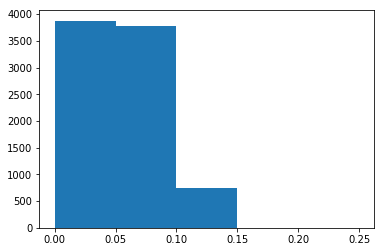

In [160]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(master_df.Discount,bins=5)

(array([7.000e+00, 9.000e+00, 7.300e+01, 8.066e+03, 1.880e+02, 4.600e+01,
        9.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([-14140.7  , -10004.561,  -5868.422,  -1732.283,   2403.856,
          6539.995,  10676.134,  14812.273,  18948.412,  23084.551,
         27220.69 ]),
 <a list of 10 Patch objects>)

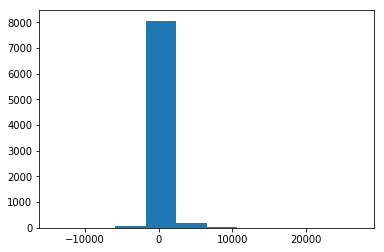

In [161]:
plt.hist(master_df.Profit)

(array([8.047e+03, 2.580e+02, 7.800e+01, 1.300e+01, 1.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([2.2400000e+00, 8.9081210e+03, 1.7814002e+04, 2.6719883e+04,
        3.5625764e+04, 4.4531645e+04, 5.3437526e+04, 6.2343407e+04,
        7.1249288e+04, 8.0155169e+04, 8.9061050e+04]),
 <a list of 10 Patch objects>)

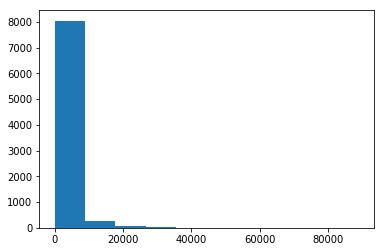

In [162]:
plt.hist(master_df.Sales)

{'whiskers': [<matplotlib.lines.Line2D at 0x2037e317ef0>,
 'caps': [<matplotlib.lines.Line2D at 0x2037e322cc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2037e322278>],
 'medians': [<matplotlib.lines.Line2D at 0x2037e329898>],
 'fliers': [<matplotlib.lines.Line2D at 0x2037e329cc0>],
 'means': []}

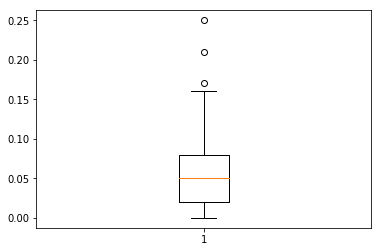

In [164]:
plt.boxplot(master_df.Discount)

In [167]:
q1 = np.quantile(master_df.Discount,0.25)
q2 = np.quantile(master_df.Discount,0.5)
q3 = np.quantile(master_df.Discount,0.75)
IQR = 1.5*(q3-q1)
# the values greater than q3+iqr or 
#the values less tahn q1-iqr are outliers
#(q1-iqr,q3+iqr)
(q1-IQR,q3+IQR)

(-0.06999999999999999, 0.16999999999999998)

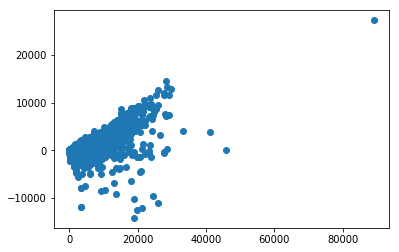

In [168]:
plt.scatter(master_df.Sales,master_df.Profit)

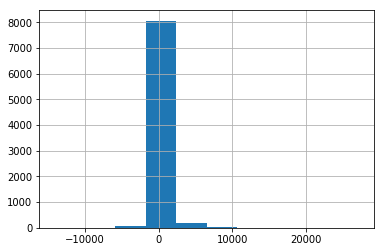

In [169]:
master_df.Profit.hist()

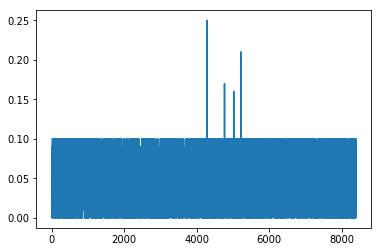

In [172]:
master_df.Discount.plot()

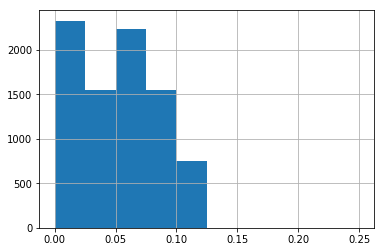

In [173]:
master_df.Discount.hist()

In [177]:
i = master_df.Customer_Segment.value_counts().index
v = master_df.Customer_Segment.value_counts()

<BarContainer object of 4 artists>

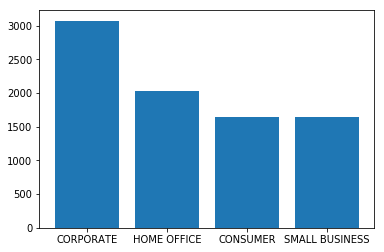

In [178]:
plt.bar(i,v)

C:\Users\krish\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


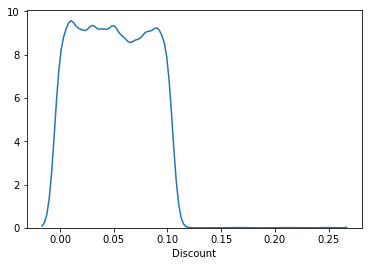

In [181]:
import seaborn as sns
sns.distplot(master_df.Discount,hist=False)

C:\Users\krish\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


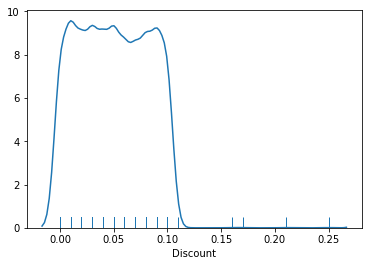

In [182]:
sns.distplot(master_df.Discount,hist=False,\
             rug=True)

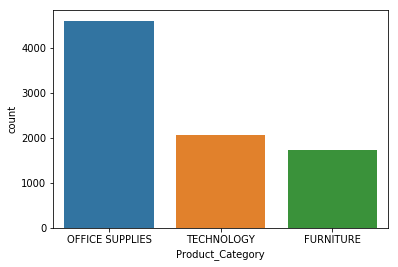

In [183]:
sns.countplot(master_df.Product_Category)

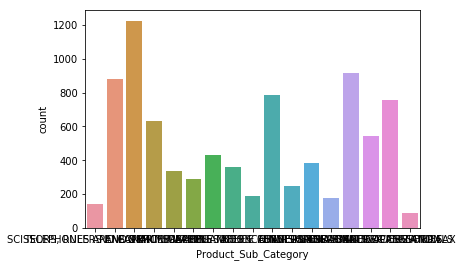

In [184]:
sns.countplot(master_df.Product_Sub_Category)

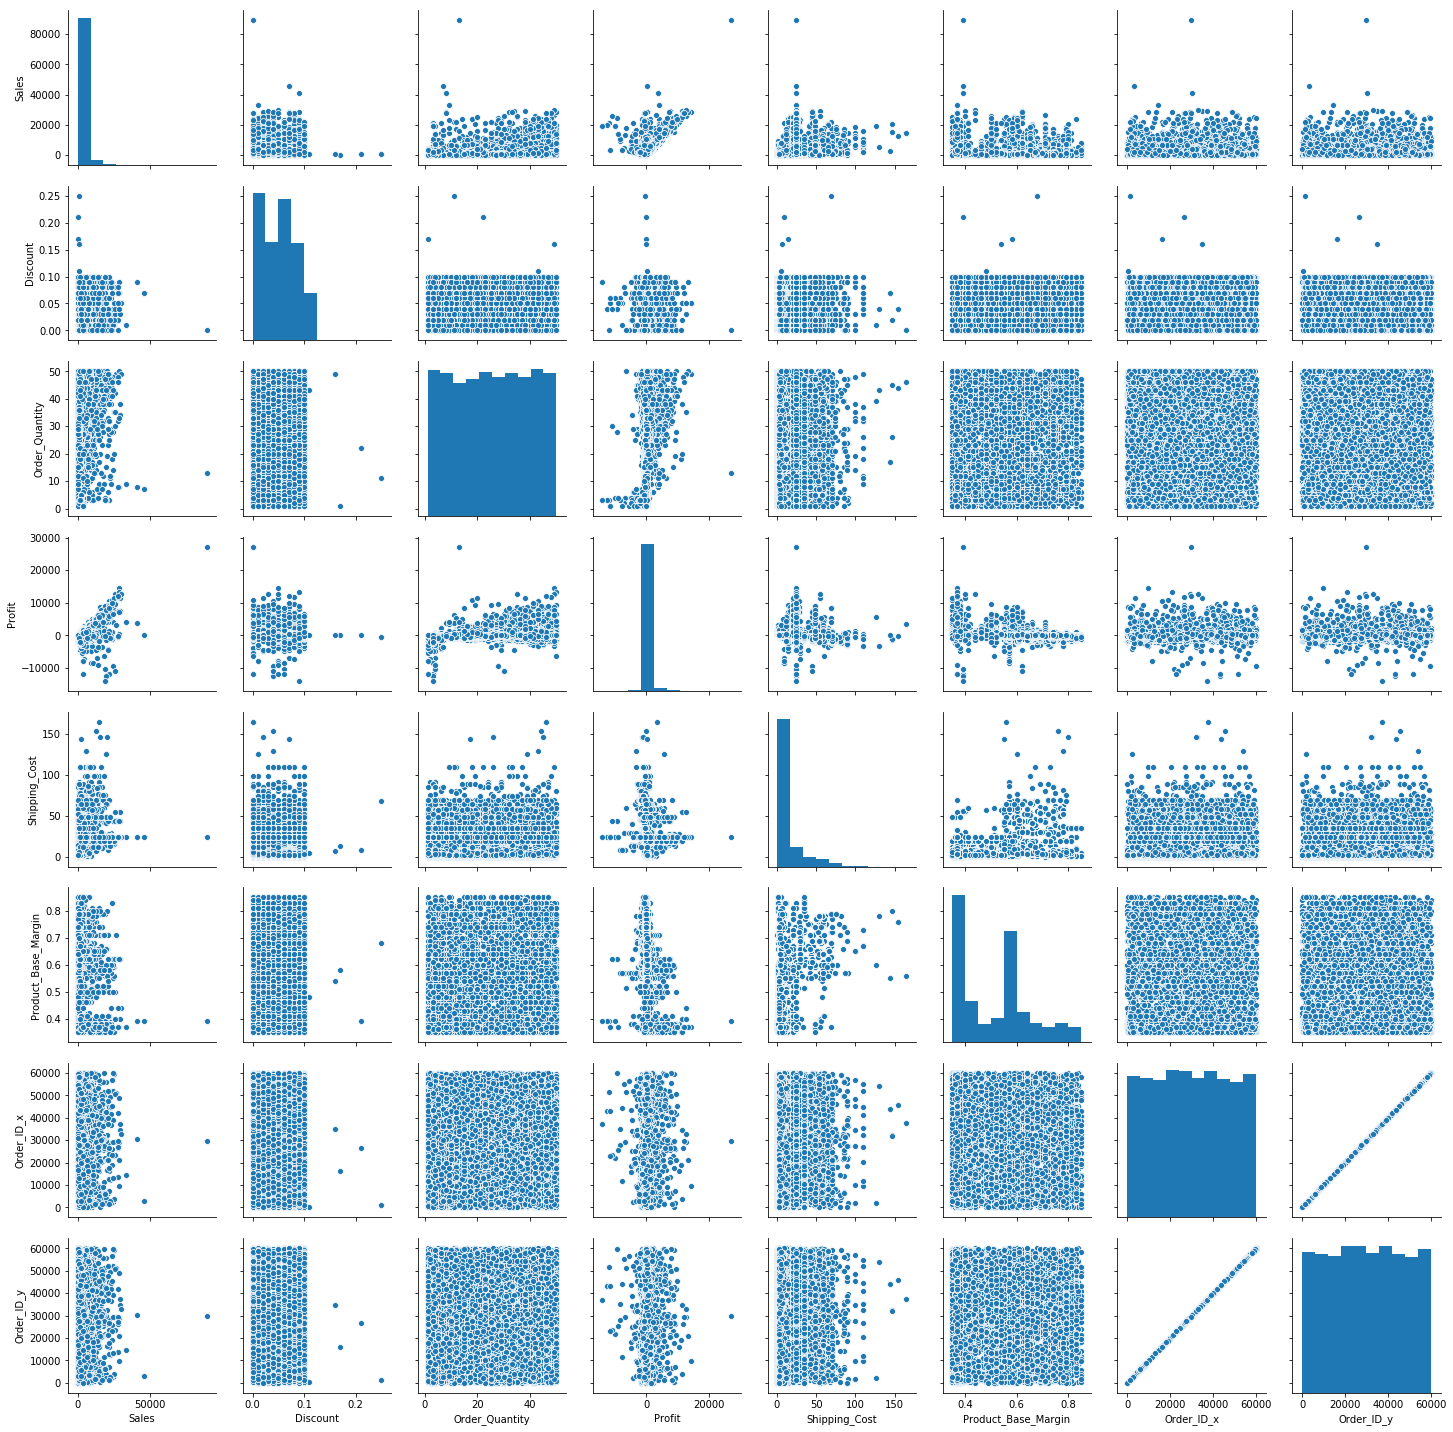

In [185]:
sns.pairplot(master_df)

In [186]:
master_df.corr()

,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin,Order_ID_x,Order_ID_y
Sales,1.000000,-0.019686,0.220582,0.581960,0.434578,0.155794,-0.007792,-0.007792
Discount,-0.019686,1.000000,-0.009649,-0.037128,-0.001956,0.004062,-0.003213,-0.003213
Order_Quantity,0.220582,-0.009649,1.000000,0.194655,-0.011457,0.007817,0.010953,0.010953
Profit,0.581960,-0.037128,0.194655,1.000000,-0.021362,-0.112124,-0.006820,-0.006820
Shipping_Cost,0.434578,-0.001956,-0.011457,-0.021362,1.000000,0.371056,-0.004582,-0.004582
Product_Base_Margin,0.155794,0.004062,0.007817,-0.112124,0.371056,1.000000,-0.022467,-0.022467
Order_ID_x,-0.007792,-0.003213,0.010953,-0.006820,-0.004582,-0.022467,1.000000,1.000000
Order_ID_y,-0.007792,-0.003213,0.010953,-0.006820,-0.004582,-0.022467,1.000000,1.000000


C:\Users\krish\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


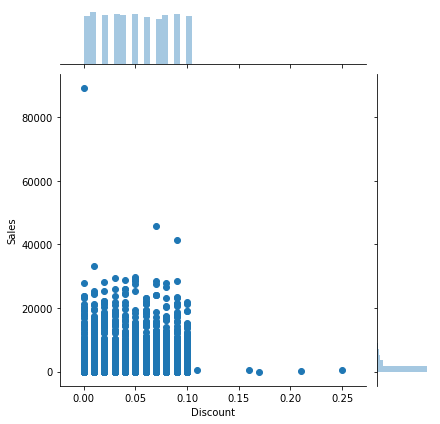

In [188]:
sns.jointplot(master_df.Discount,master_df.Sales)

C:\Users\krish\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


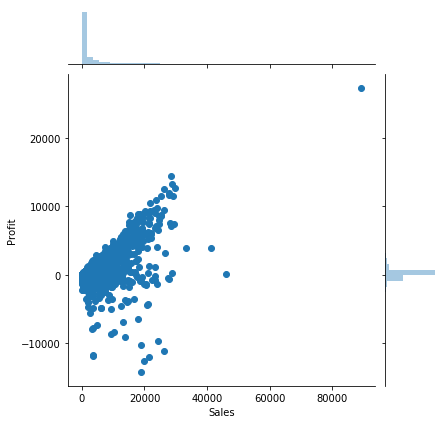

In [189]:
sns.jointplot('Sales','Profit',master_df)

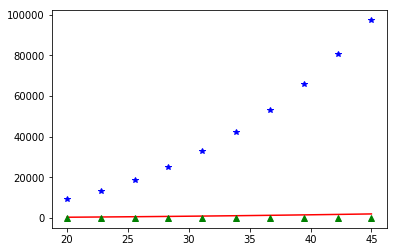

In [194]:
a = np.linspace(20,45,10)
plt.plot(a,a**2,'-r')
plt.plot(a,a*3+5,'^g')
plt.plot(a,a**3+3*a**2+8,'*b')

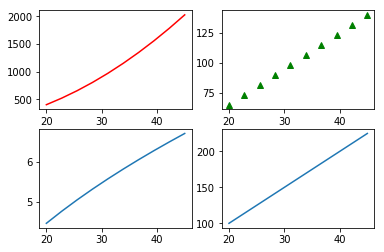

In [195]:
plt.subplot(2,2,1)
plt.plot(a,a**2,'-r')
plt.subplot(2,2,2)
plt.plot(a,a*3+5,'^g')
plt.subplot(2,2,3)
plt.plot(a,a**0.5)
plt.subplot(2,2,4)
plt.plot(a,a*5)

In [196]:
master_df.isnull().sum()

Ord_id                  0
Prod_id                 0
Ship_id                 0
Cust_id                 0
Sales                   0
Discount                0
Order_Quantity          0
Profit                  0
Shipping_Cost           0
Product_Base_Margin     0
Order_ID_x              0
Ship_Mode               0
Ship_Date               0
Customer_Name           0
Province                0
Region                  0
Customer_Segment        0
Order_ID_y              0
Order_Date              0
Order_Priority          0
Product_Category        0
Product_Sub_Category    0
dtype: int64

In [200]:
numerical_col = \
  master_df.columns[master_df.dtypes !=object]
numerical_col

Index(['Sales', 'Discount', 'Order_Quantity', 'Profit', 'Shipping_Cost',
       'Product_Base_Margin', 'Order_ID_x', 'Order_ID_y'],
      dtype='object')

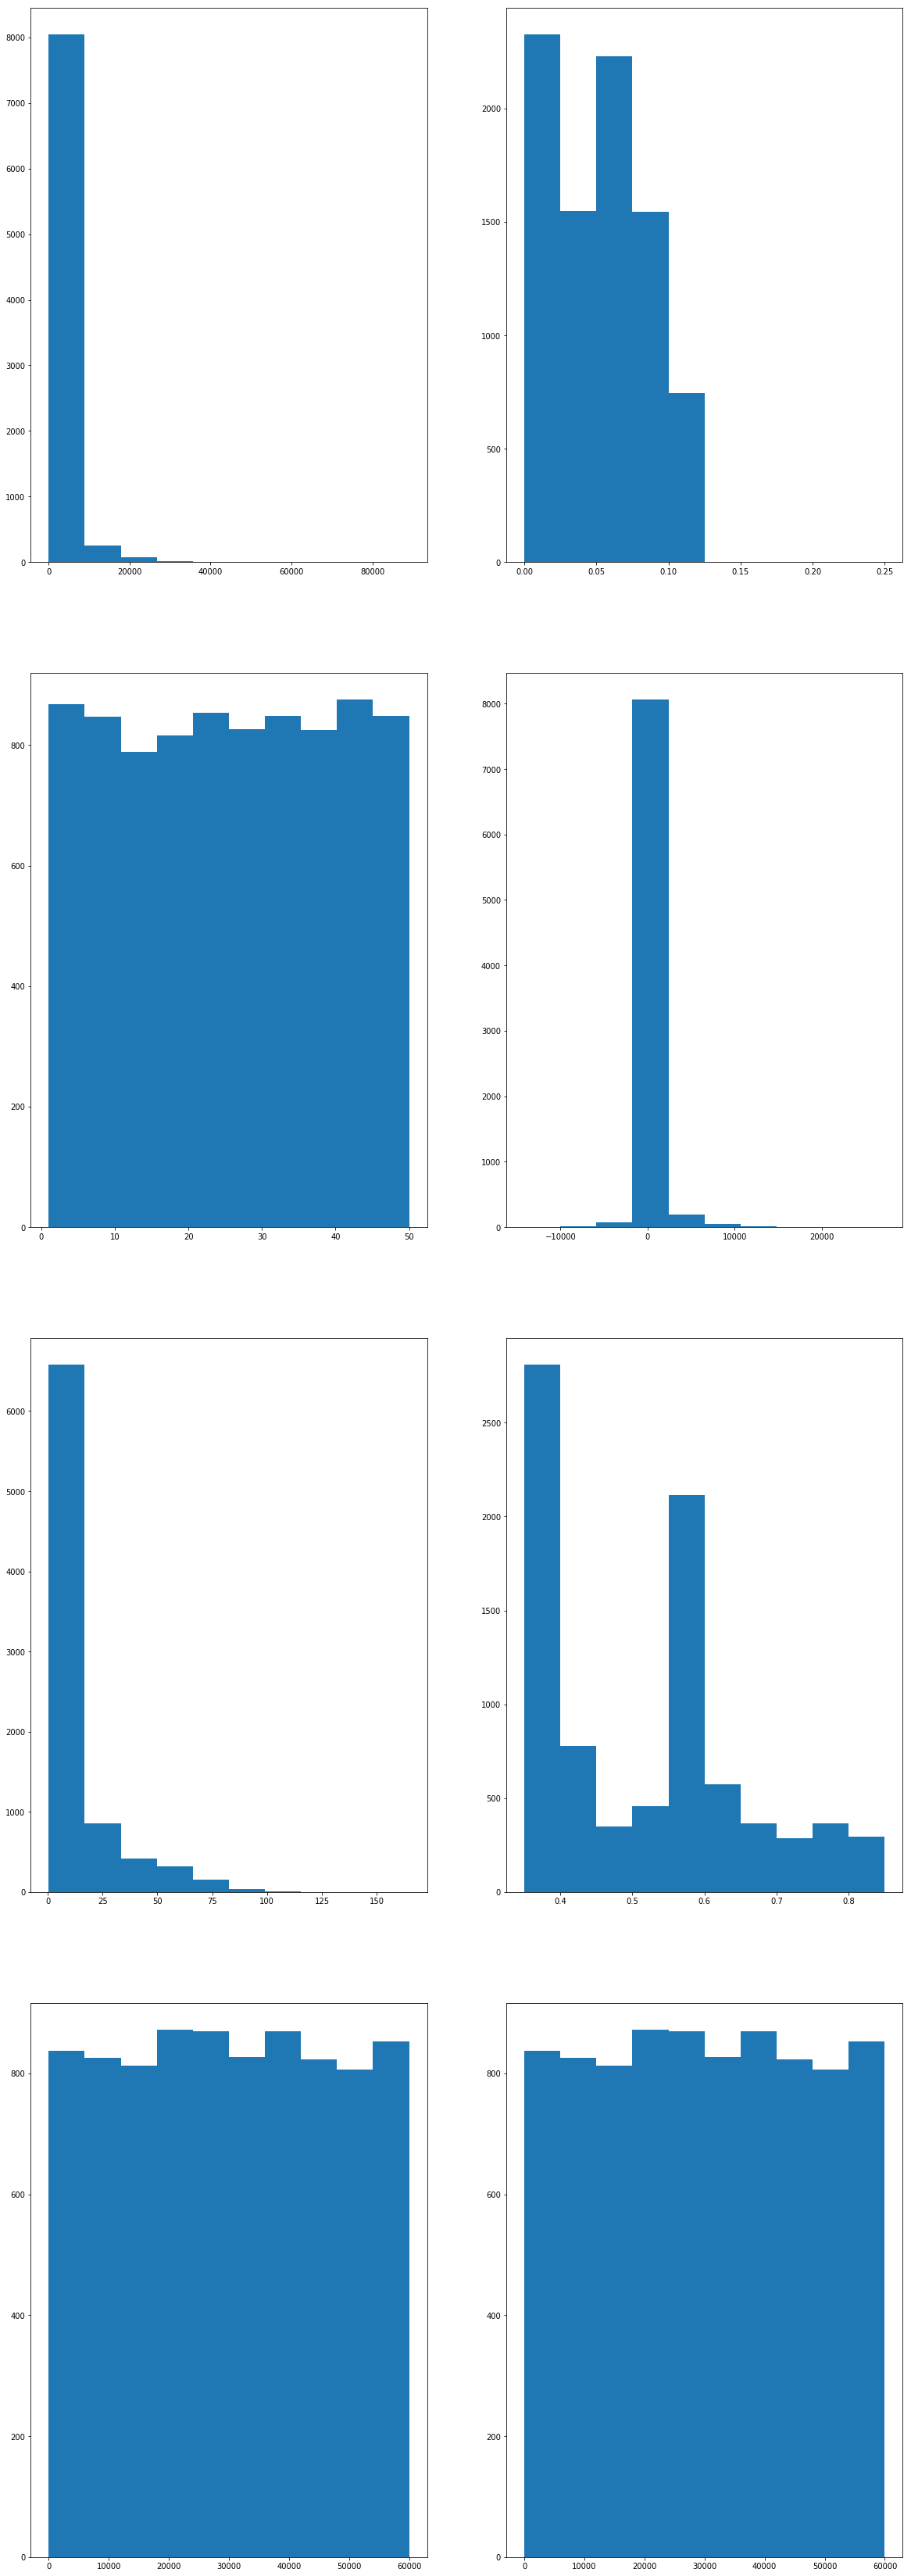

In [204]:
plt.figure(figsize=(20,60))
for i in range(len(numerical_col)):
    plt.subplot(4,2,i+1)
    plt.hist(master_df[numerical_col[i]])

Other plt functions<br>
plt.title<br>
plt.xlim<br>
plt.ylim<br>
plt.xticks<br>
plt.xlabel<br>